# 線形回帰

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Q1 最急降下法

線形回帰により、patal_lengthからpatal_widthを予測する仮説関数のパラメータを学習する。

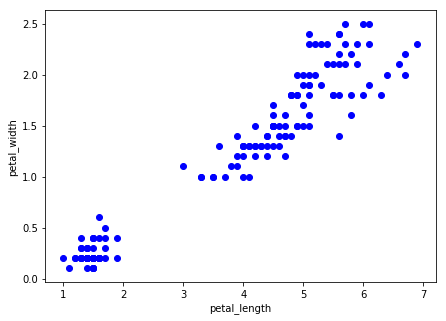

In [4]:
iris = pd.read_csv('ex8/iris.csv')
plt.figure(figsize=(7,5))
plt.xlabel('petal_length')
plt.ylabel('petal_width')
plt.scatter(iris['petal_length'], iris['petal_width'], c='blue');

まず、patal_lengthを出力X, patal_widthを出力としてそれぞれを標準化する。また、入力のデータにバイアス項($x_{0}=1$)を追加するため、入力の先頭列に1を要素とする列ベクトルを挿入する。これにより、入力と出力はデータ数をmとして以下のような行列($m \times 2$)とベクトル($m \times 1$)になる。

$
  X = \left(
    \begin{array}{cc}
      1 &   x^{(1)} \\
      1 &   x^{(2)}  \\
      ... & ... \\
      1 &  x^{(m)}
    \end{array}
  \right)
$

$x^{(i)}$は標準化された特徴量petal_length。

$
  y = \left(
    \begin{array}{c}
       y^{(1)}  \\
      ...\\
        y^{(m)}  \\
    \end{array}
  \right)
$

$y^{(i)}$は標準化された特徴量petal_width。

In [5]:
X=iris[['petal_length']].values
y=iris[['petal_width']].values

X_norm=(X-np.mean(X, axis=0))/np.std(X, axis=0) # 標準化
y_norm=(y-np.mean(y, axis=0))/np.std(y, axis=0) # 標準化

X_norm=np.insert(X_norm, 0, np.ones((1,X.shape[0]), dtype=int), axis=1) # バイアス項の追加

print(X_norm[:10,:])
print(y_norm[:10])

[[ 1.         -1.3412724 ]
 [ 1.         -1.3412724 ]
 [ 1.         -1.39813811]
 [ 1.         -1.2844067 ]
 [ 1.         -1.3412724 ]
 [ 1.         -1.17067529]
 [ 1.         -1.3412724 ]
 [ 1.         -1.2844067 ]
 [ 1.         -1.3412724 ]
 [ 1.         -1.2844067 ]]
[[-1.31297673]
 [-1.31297673]
 [-1.31297673]
 [-1.31297673]
 [-1.31297673]
 [-1.05003079]
 [-1.18150376]
 [-1.31297673]
 [-1.31297673]
 [-1.4444497 ]]


以下では、最急降下法を用いた線形回帰により、訓練データセットを元に入力から出力を予測する仮説関数のパラメータを学習するgraddes関数を実装する。

In [12]:
def graddes(X, y, alpha, n_iter):  
    m = X.shape[0] # データ数
    n =  X.shape[1] # 次元（特徴量）数
    
    costs=[]
    w = np.zeros((n,1)) 
    
    for i in range(n_iter):
            h = np.dot(X,w)
            J = 1/(2*m)*np.linalg.norm(h-y)**2
            costs.append(J)
            for j in range(X.shape[1]):
                w = w - alpha/m*np.dot(X.T, (h-y))
    return costs, w

以下のセルで動作確認をする。irisデータセットの特徴量patal_lengthを入力、patal_widthを出力とした訓練データセットを与え、学習率を0.01、学習のエポック数を100とする。グラフは各エポックでのコスト関数の値の変化を表す。グラフより、パラメータの更新によってコスト関数の値が減少していくことがわかる。

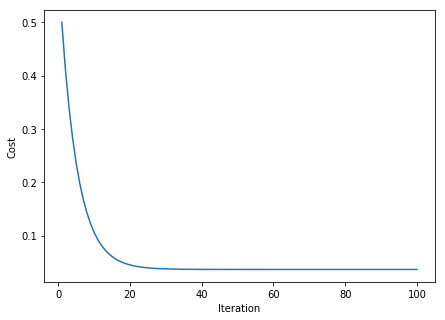

In [13]:
n_iter=100
alpha=0.05
costs, w = graddes(X_norm, y_norm, alpha, n_iter)

plt.figure(figsize=(7,5))
plt.ylabel('Cost')
plt.xlabel('Iteration');
plt.plot(range(1,n_iter+1),costs);

100回のエポックで学習されたパラメータ$\theta_0, \theta_1$を用いて特徴量petal_lengthを入力$x$、特徴量petal_lengthを出力$y$とした時の直線$y=\theta_0+\theta_1x$は以下のようになります。この時の最終的なコスト関数の値は約0.036、パラメータ$\theta_0, \theta_1$の値はそれぞれ約`[[-3.72239276e-16], [ 9.57057066e-01]]`となる。

0.03654938644266248
[[-3.90280401e-16]
 [ 9.62731525e-01]]


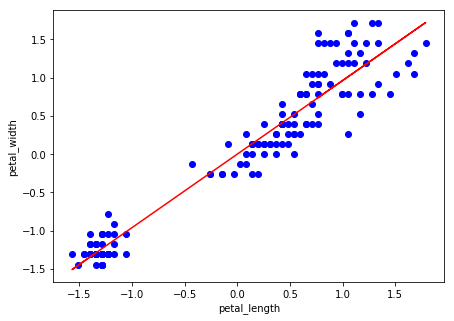

In [14]:
n_iter=100
alpha=0.05
costs, w = graddes(X_norm, y_norm, alpha, n_iter)
print(costs[-1])
print(w)
plt.figure(figsize=(7,5))
plt.xlabel('petal_length')
plt.ylabel('petal_width')
plt.scatter(X_norm[:,1],y_norm[:,0],c='blue')
plt.plot(X_norm[:,1], np.dot(X_norm,w)[:,0], color='red');

0.23604967880357772
[[3.70814490e-17]
 [3.94258659e-01]]


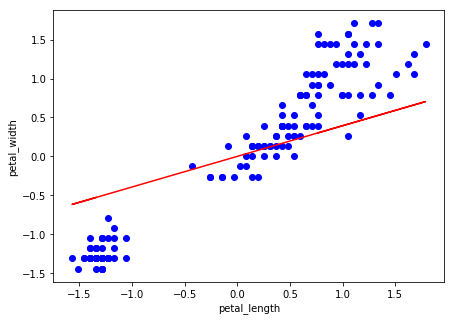

In [15]:
n_iter=5
alpha=0.05
costs, w = graddes(X_norm, y_norm, alpha, n_iter)
print(costs[-1])
print(w)
plt.figure(figsize=(7,5))
plt.xlabel('petal_length')
plt.ylabel('petal_width')
plt.scatter(X_norm[:,1],y_norm[:,0],c='blue')
plt.plot(X_norm[:,1], np.dot(X_norm,w)[:,0], color='red');

0.04500643452553342
[[-2.69340106e-16]
 [ 8.45708310e-01]]


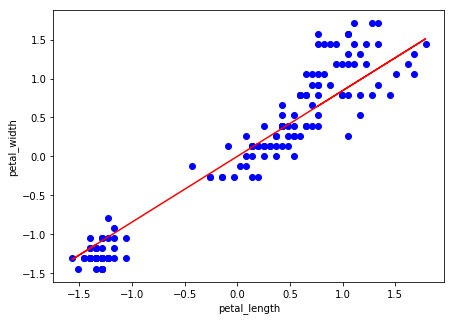

In [16]:
n_iter=20
alpha=0.05
costs, w = graddes(X_norm, y_norm, alpha, n_iter)
print(costs[-1])
print(w)
plt.figure(figsize=(7,5))
plt.xlabel('petal_length')
plt.ylabel('petal_width')
plt.scatter(X_norm[:,1],y_norm[:,0],c='blue')
plt.plot(X_norm[:,1], np.dot(X_norm,w)[:,0], color='red');

## 正規方程式

線形回帰のパラメータは訓練データセットの入力Xと出力yに対して以下の正規方程式をとくことによって解析的に得ることができる。  
$\theta = (X^TX)^{-1}X^Ty$  
正規方程式を用いて、訓練データセットを元に入力から出力を予測するパラメータを求めるnormal_equation関数を実装せよ。

In [17]:
def normal_equation(X, y):
    inv = np.linalg.inv(np.dot(X.T, X))
    return np.dot(inv, np.dot(X.T, y))

[[8.14022844e-16]
 [9.62757097e-01]]


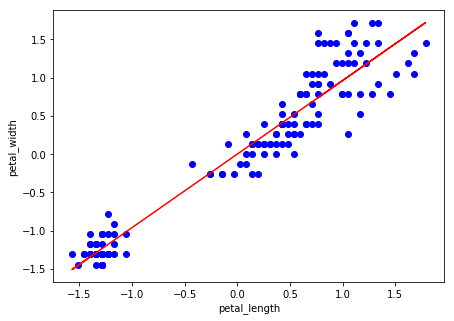

In [18]:
w=normal_equation(X_norm, y_norm)
print(w)
plt.figure(figsize=(7,5))
plt.xlabel('petal_length')
plt.ylabel('petal_width')
plt.scatter(X_norm[:,1],y_norm[:,0],c='blue')
plt.plot(X_norm[:,1], np.dot(X_norm,w)[:,0], color='red');